In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('penguins_size.csv')

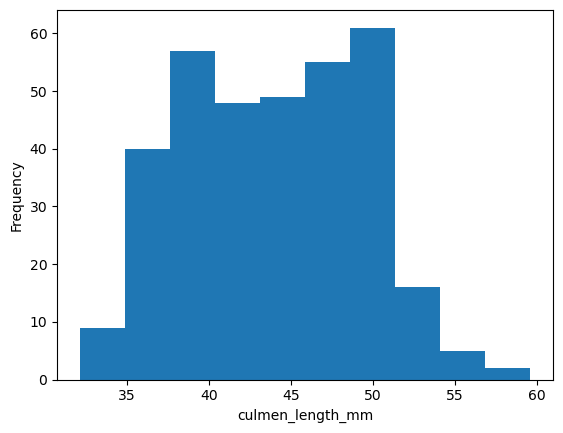

In [8]:
import matplotlib.pyplot as plt

# Example: Histogram of a numeric variable
plt.hist(df['culmen_length_mm'], bins=10)
plt.xlabel('culmen_length_mm')
plt.ylabel('Frequency')
plt.show()

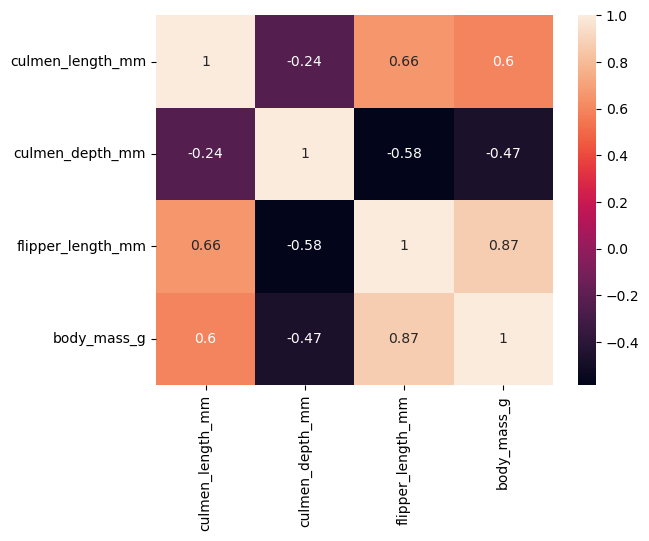

In [9]:
import seaborn as sns

# Example: Heatmap of correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [10]:
# Example: Descriptive statistics of numeric variables
descriptive_stats = df.describe()
print(descriptive_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [11]:
# Example: Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Example: Deal with missing values by dropping rows with missing values
df = df.dropna()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [12]:
df=df.fillna(1)

In [13]:
# Example: Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Example: Deal with missing values by dropping rows with missing values
df = df.dropna()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [14]:
# Example: Identify outliers using the z-score method
from scipy.stats import zscore

z_scores = zscore(df['culmen_length_mm'])
outliers = df[abs(z_scores) > 3]

# Example: Replace outliers with the median value
median_value = df['culmen_length_mm'].median()
df.loc[abs(z_scores) > 3, 'culmen_length_mm'] = median_value

In [15]:
# Example: Check for categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Example: Perform one-hot encoding using pandas get_dummies
encoded_df = pd.get_dummies(df[categorical_columns], drop_first=True)
df = pd.concat([df, encoded_df], axis=1)

In [16]:
df['sex'] = df['sex'].map({'MALE': 1, 'FEMALE': 0})
df['island'] = df['island'].map({'Torgerson': 1, 'Biscoe': 0})
df['species'] = df['species'].map({'Adelie': 1, 'Chinstrap': 0})

In [17]:
# Example: Split into dependent and independent variables
X = df[['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex']]  # Independent variables
y = df['species']  # Dependent variable

In [18]:
missing_values = y.isnull().sum()
print(missing_values)

# Example: Deal with missing values by dropping rows with missing values
df = y.dropna()

120


In [19]:
y=y.fillna(1)

In [20]:
missing_values = X.isnull().sum()
print(missing_values)

# Example: Deal with missing values by dropping rows with missing values
df = X.dropna()

island               170
culmen_length_mm       0
culmen_depth_mm        0
flipper_length_mm      0
body_mass_g            0
sex                    1
dtype: int64


In [21]:
X=X.fillna(1)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with an imputer and LinearRegression
pipeline = make_pipeline(SimpleImputer(), LinearRegression())

# Fit the model on the data
pipeline.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [23]:
# Example: Standardize independent variables using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Example: Split into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Example: Build a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
# Example: Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)